In [2]:
pip install --upgrade tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.0 MB 8.3 MB/s eta 0:00:47
   ---------------------------------------- 0.7/385.0 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 1.7/385.0 MB 13.4 MB/s eta 0:00:29
   ---------------------------------------- 2.8/385.0 MB 18.2 MB/s eta 0:00:22
   ---------------------------------------- 2.8/385.0 MB 18.2 MB/s eta 0:00:22
   ---------------------------------------- 2.8/385.0 MB 18.2 MB/s eta 0:00:22
   ---------------------------------------- 2.8/385.0 MB 18.2 MB/s eta 0:00:22
    --------------------------------------- 5.0/385.0 MB 13.3 MB/s eta 0:00:29
    --------------------------------------- 5.7/385.0 MB 13.5 MB/s eta 0:00:29
    --------------------------------------- 8.6/385.0 MB 18.4 MB/s 

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Model A Implementation

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

modela = models.Sequential([
    layers.InputLayer(input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modela.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Tarra Priyadarshini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Model B Implementation

In [2]:
modelb = models.Sequential([
    layers.InputLayer(input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Preparation

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_img , train_label), (test_img, test_label) = mnist.load_data()

train_img = train_img.reshape((60000, 28 * 28)).astype('float32') / 255
test_img = test_img.reshape((10000, 28 * 28)).astype('float32') / 255

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [9]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Tarra Priyadarshini\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


#  Training Model A and Model B

In [7]:
historya = modela.fit(train_img, train_label, epochs=500, batch_size=64, validation_data=(test_img, test_label))

historyb = modelb.fit(train_img, train_label, epochs=500, batch_size=64, validation_data=(test_img, test_label))

Epoch 1/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8385 - loss: 0.5259 - val_accuracy: 0.9572 - val_loss: 0.1364
Epoch 2/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9619 - loss: 0.1275 - val_accuracy: 0.9633 - val_loss: 0.1162
Epoch 3/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9729 - loss: 0.0864 - val_accuracy: 0.9668 - val_loss: 0.1023
Epoch 4/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9793 - loss: 0.0659 - val_accuracy: 0.9714 - val_loss: 0.0934
Epoch 5/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9731 - val_loss: 0.0887
Epoch 6/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0451 - val_accuracy: 0.9676 - val_loss: 0.1090
Epoch 7/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9784 - val_loss: 0.0762
Epoch 8/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9899 - loss: 0.0303 - val_accu

# Evaluate Model A and Model B

In [8]:
test_lossa, test_acca = modela.evaluate(test_img, test_label)


test_lossb, test_accb = modelb.evaluate(test_img, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.6957
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.4583


# Plotting Training Error vs Training Time for Model A and B

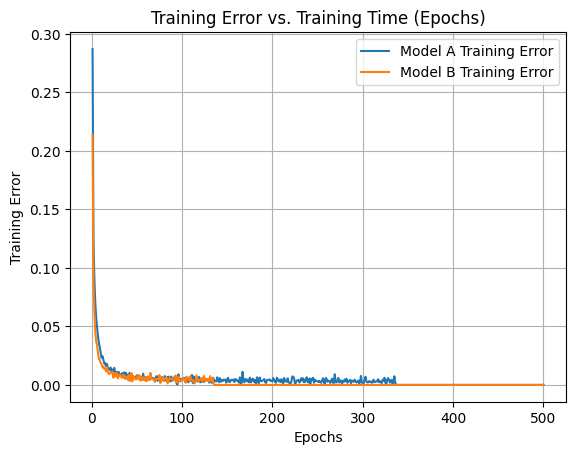

In [10]:
import matplotlib.pyplot as plt

training_lossa = historya.history['loss']
epochsa = range(1, len(training_lossa) + 1)

training_lossb = historyb.history['loss']
epochsb = range(1, len(training_lossb) + 1)

plt.plot(epochsa, training_lossa, label='Model A Training Err')
plt.plot(epochsb, training_lossb, label='Model B Training Err')

plt.title('Training Err vs. Training Time (Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Training Err')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training and Testing Error vs Training Time for Model A and B

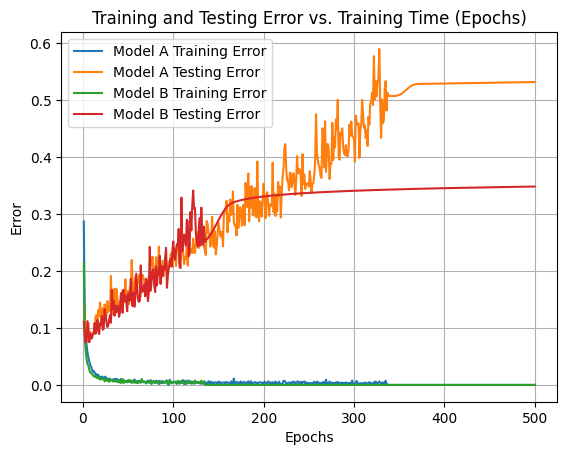

In [11]:
val_lossa = historya.history['val_loss']

val_lossb = historyb.history['val_loss']

plt.plot(epochsa, training_lossa, label='Model A Training Err')
plt.plot(epochsa, val_lossa, label='Model A Testing Err')
plt.plot(epochsb, training_lossb, label='Model B Training Err')
plt.plot(epochsb, val_lossb, label='Model B Testing Err')

plt.title('Training and Testing Err vs Training Time (Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Err')
plt.legend()
plt.grid(True)
plt.show()


# Plotting Loss (Training and Testing) vs Number of Epochs

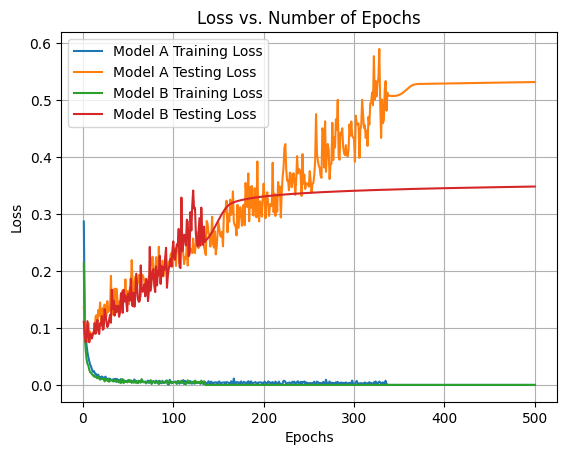

In [12]:
plt.plot(epochsa, training_lossa, label='Model A Training Loss')
plt.plot(epochsa, val_lossa, label='Model A Testing Loss')

plt.plot(epochsb, training_lossb, label='Model B Training Loss')
plt.plot(epochsb, val_lossb, label='Model B Testing Loss')

plt.title('Loss vs Number of Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
